<a href="https://colab.research.google.com/github/SamuelDlbr/Carto_noms_communes/blob/main/Noms_de_communes_par_dpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 40.4 MB/s 
     |████████████████████████████████| 15.4 MB 38.2 MB/s 


In [ ]:
import pandas as pd
from google.colab import files
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from operator import add
import numpy as np

In [ ]:
files.upload()

Saving communes-departement-region.csv to communes-departement-region.csv


{'communes-departement-region.csv': b"code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region\n1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,,46.1534255214,4.92611354223,1,L',Abergement-Cl\xc3\xa9menciat,L'Abergement-Cl\xc3\xa9menciat,1,Ain,84,Auvergne-Rh\xc3\xb4ne-Alpes\n1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,,46.0091878776,5.42801696363,2,L',Abergement-de-Varey,L'Abergement-de-Varey,1,Ain,84,Auvergne-Rh\xc3\xb4ne-Alpes\n1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,,45.9608475114,5.3729257777,4,,Amb\xc3\xa9rieu-en-Bugey,Amb\xc3\xa9rieu-en-Bugey,1,Ain,84,Auvergne-Rh\xc3\xb4ne-Alpes\n1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,,45.9961799872,4.91227250796,5,,Amb\xc3\xa9rieux-en-Dombes,Amb\xc3\xa9rieux-en-Dombes,1,Ain,84,Auvergne-Rh\xc3\xb4ne-Alpes\n1006,AMBLEON,1300,AMBLEON,,45.7494989044,5.59432017366,6,

In [ ]:
def fix_dpt(n):
  if len(n) == 1:
    n = '0'+ n
  return(n)

In [ ]:
data = pd.read_csv("/content/communes-departement-region.csv")

In [ ]:
dpt = gpd.read_file('/content/departements-20170102.shp')

In [ ]:
colors.keys()

dict_keys(['urt', 'nac', 'lle', 'res'])

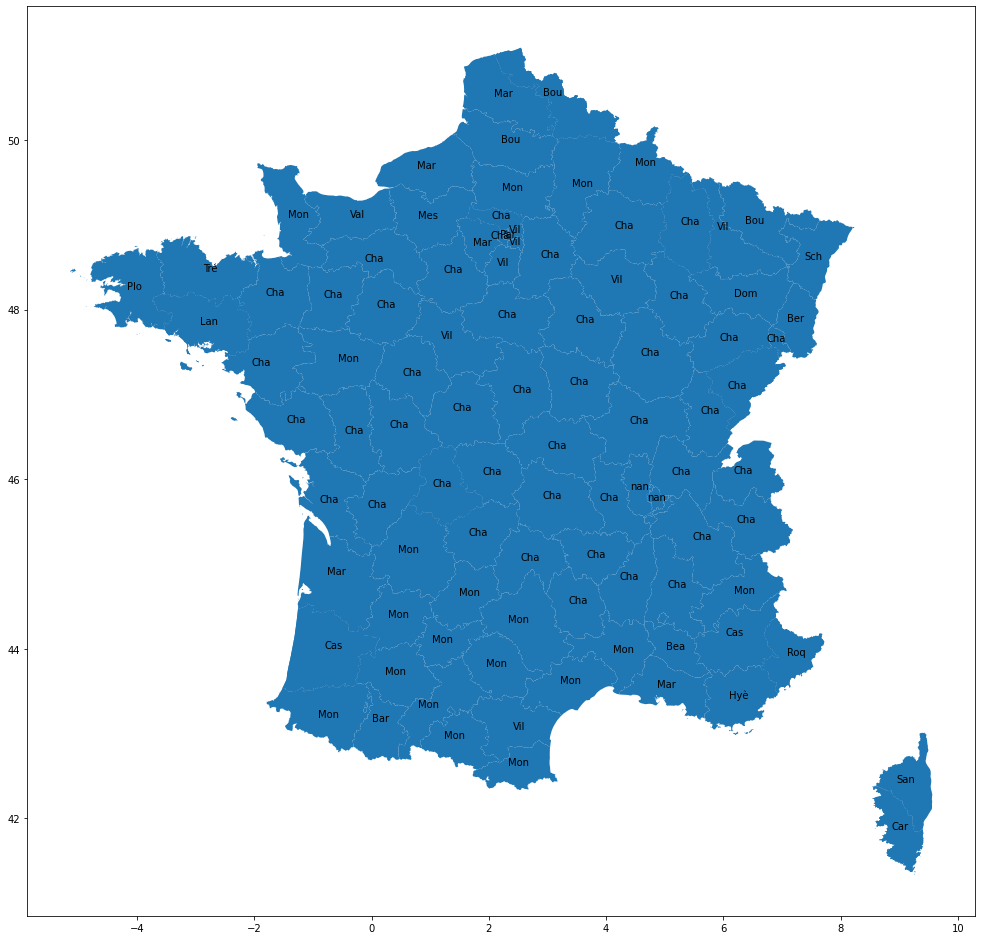

In [ ]:
data['nom_commune'] = data['nom_commune'].apply(lambda x: x.replace("Saint-","").replace("Sainte-",""))

data['element_nom_commune'] = data['nom_commune'].apply(lambda x: x[:3])
data1 = data.groupby(by=['code_departement','element_nom_commune']).count()

data2 = data1.groupby(['code_departement'], sort=False)['nom_commune'].max()
idx = data1.groupby(['code_departement'])['nom_commune'].transform(max) == data1['nom_commune']

maxs = data1[idx]
maxs = maxs.reset_index()
maxs['code_departement'] = maxs['code_departement'].apply(fix_dpt)
maxs = maxs[['code_departement','element_nom_commune']]
maxs = maxs.set_index('code_departement')

dpt_metro = dpt[~dpt.code_insee.isin(['971','972','973','974','976'])]

dpt_metro = dpt_metro.set_index('code_insee')
dpt_metro = dpt_metro.join(maxs)

dpt_metro['coords'] = dpt_metro['geometry'].apply(lambda x: x.representative_point().coords[:])
dpt_metro['coords'] = [coords[0] for coords in dpt_metro['coords']]

plt.rcParams["figure.figsize"] = (17,17)

dpt_metro.plot()
xy = [0,0]

for idx, row in dpt_metro.iterrows():
    if xy != row['coords'] :
      plt.annotate(s=row['element_nom_commune'], xy=row['coords'],
                  horizontalalignment='center')
      xy=row['coords']

In [ ]:
data_dpt = data[data.code_departement == "63"] 
data_dpt[data_dpt.element_nom_commune == "Cha"]

code_commune_INSEE  ... element_nom_commune
27333              63072  ...                 Cha
27334              63073  ...                 Cha
27335              63074  ...                 Cha
27336              63075  ...                 Cha
27337              63076  ...                 Cha
27338              63077  ...                 Cha
27339              63078  ...                 Cha
27340              63079  ...                 Cha
27341              63080  ...                 Cha
27342              63081  ...                 Cha
27343              63082  ...                 Cha
27344              63083  ...                 Cha
27345              63084  ...                 Cha
27346              63085  ...                 Cha
27347              63086  ...                 Cha
27348              63087  ...                 Cha
27349              63088  ...                 Cha
27350              63089  ...                 Cha
27351              63090  ...                 Cha
27352              63091  ...                 Cha
27353              63092  ...                 Cha
27354              63092  ...                 Cha
27355              63093  ...                 Cha
27356              63094  ...                 Cha
27357              63095  ...                 Cha
27358              63096  ...                 Cha
27359              63097  ...                 Cha
27360              63098  ...                 Cha
27367              63104  ...                 Cha
27368              63105  ...                 Cha
27369              63106  ...                 Cha
27370              63107  ...                 Cha
27510              63244  ...                 Cha
27511              63244  ...                 Cha

[34 rows x 16 columns]

In [ ]:
data[data.code_departement=="14"].groupby(by=['element_nom_commune']).count()

code_commune_INSEE  ...  nom_region
element_nom_commune                      ...            
-Bû                                   1  ...           1
Agy                                   1  ...           1
Bô                                    1  ...           1
Dan                                   1  ...           1
Eau                                   1  ...           1
...                                 ...  ...         ...
êne                                   1  ...           1
îne                                   1  ...           1
ôme                                   4  ...           4
œil                                   1  ...           1
œuf                                   2  ...           2

[209 rows x 15 columns]